In [1]:
import torchvision
import torchvision.models as models
from PIL import Image, ImageDraw 
import numpy as np
import torch as t
from torch import nn
import pickle

In [2]:
model = models.vgg16_bn(pretrained=True, progress=False)

In [92]:
image_fake = Image.open("1790_fake.png")
image_real = Image.open("1790_real.png")
image_fake_arr = np.asarray(image_fake, dtype='uint8')
image_real_arr = np.asarray(image_real, dtype='uint8')
image_fake_tensor = t.from_numpy(image_fake_arr)
image_real_tensor = t.from_numpy(image_real_arr)

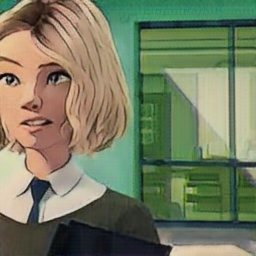

In [21]:
image_fake

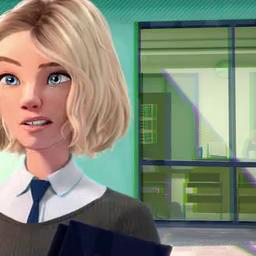

In [22]:
image_real

In [3]:
model.features = model.features[:10] #3 convolution layers cut
model.classifier = nn.Sequential()
# model.avgpool = nn.Sequential()

In [246]:
with open("VGG_3conv.pickle", "wb") as f:
    pickle.dump(model, f)

In [218]:
with open("VGG.pickle", "rb") as f:
    model = pickle.load(f)

In [245]:
model #cutted model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential()
)

In [232]:
for layer in model.features: #forbid training
    layer.trainable = False

In [99]:
image_fake_arr.shape

(256, 256, 3)

In [100]:
s = image_fake_arr.shape
X_fake = torchvision.transforms.functional.to_tensor(image_fake_arr.reshape(s[2], s[0], s[1]))

In [101]:
s = image_fake_arr.shape
X_real = torchvision.transforms.functional.to_tensor(image_real_arr.reshape(s[2], s[0], s[1]))

In [103]:
X_fake.shape

torch.Size([256, 3, 256])

In [238]:
%%time
res_fake = model.forward(X_fake.view(1, s[2], s[0], s[1]))
res_real = model.forward(X_real.view(1, s[2], s[0], s[1]))

CPU times: user 510 ms, sys: 95.8 ms, total: 605 ms
Wall time: 511 ms


In [235]:
res_fake.shape

torch.Size([1, 6272])

In [88]:
loss = nn.L1Loss()

In [241]:
%%time
loss(res_fake, res_real)#.backward() #vgg loss

CPU times: user 463 µs, sys: 147 µs, total: 610 µs
Wall time: 437 µs


tensor(0.0164, grad_fn=<L1LossBackward>)

In [242]:
loss(X_fake, X_real) #old loss

tensor(0.0668)